# <a id='introduction'></a>
<h1 style='background:#5ced73;border-radius: 10px; color:black;height: 45px'>
<center>Predictive Modelling and Analysis of Airfare trends & Ticket 
Pricing </center>
</h1>

<a id='Problem_Description'></a>
## Problem Description

Predicting air ticket prices is a complex challenge in the aviation industry due to the dynamic nature of pricing strategies employed by airlines. These prices are influenced by various factors, including demand fluctuations, seasonal trends, flight duration, and the specific route taken by the flight. Accurately forecasting these prices is essential for both airlines, which seek to optimize revenue, and passengers, who aim to find the best possible deals.

### Business Problem

The Indian aviation industry is experiencing rapid growth, with an increasing number of flights and passengers each year. However, the dynamic pricing of air tickets presents a significant challenge for airlines in maximizing their revenue and for passengers in securing affordable prices. Traditional pricing models often fall short in addressing the complexities of these factors, leading to missed opportunities and suboptimal pricing strategies.

### Key Goals Objectives:

The primary objective of this project is to develop a predictive model that accurately forecasts air ticket prices for domestic flights within India. By leveraging a comprehensive dataset that includes various flight characteristics, the model aims to identify the key factors that influence pricing and provide actionable insights for both airlines and passengers.

1. **Predict Air Ticket Prices**: Develop a machine learning model capable of accurately forecasting the price of air tickets based on multiple influencing factors. This will help airlines optimize their pricing strategies and assist passengers in making informed purchasing decisions.

2. **Identify Pricing Influencers**: Analyze the factors that significantly impact air ticket pricing, such as the time of booking, flight duration, number of stops, and airline reputation. Understanding these influencers will provide deeper insights into the dynamics of airfare pricing.

3. **Enhance Decision-Making**: Provide actionable insights that can be used by stakeholders, such as airlines and passengers, to enhance their decision-making processes. Airlines can adjust their pricing strategies in real-time, while passengers can plan their purchases to secure the best deals.

### Dataset Overview

The dataset includes detailed information about various flights, such as the airline, date of journey, source and destination cities, flight duration, total stops, and ticket price. By analyzing this data, the project aims to uncover patterns and trends that influence air ticket pricing and develop a robust predictive model to forecast future prices. This model will provide valuable insights for optimizing pricing strategies and improving decision-making processes in the aviation industry.

[Back to top](#Problem_Description)


### Data Description

The dataset used in this project is focused on analyzing airfare trends and ticket pricing for flights within India. Each row in the dataset represents a specific flight, capturing various details related to the flight's characteristics, journey, and ticket price. The following are the key features included in the dataset:

- **Airline**: The name of the airline operating the flight (e.g., IndiGo, Air India, Jet Airways). This feature is essential for understanding how different airlines price their tickets.
- **Date_of_Journey**: The date on which the journey takes place. This feature helps in analyzing how ticket prices vary depending on the time of travel.
- **Source**: The city or airport of departure. This feature is crucial for identifying trends in ticket pricing based on the starting point of the journey.
- **Destination**: The city or airport of arrival. This feature, along with the source, helps in understanding route-based pricing differences.
- **Route**: The specific path taken by the flight, including any stops between the source and destination. This feature provides insights into how the route impacts ticket prices.
- **Dep_Time**: The scheduled departure time of the flight. This feature is important for analyzing how the time of day affects ticket prices.
- **Arrival_Time**: The scheduled arrival time of the flight. Similar to Dep_Time, this feature helps in understanding the impact of timing on ticket prices.
- **Duration**: The total duration of the flight, including any layovers. This feature is key to analyzing how flight duration influences pricing strategies.
- **Total_Stops**: The number of stops made by the flight during its journey. This feature indicates whether the flight is direct or has multiple stops, which can significantly affect the ticket price.
- **Additional_Info**: Extra information related to the flight or travel, such as whether meals are included or any other relevant details. This feature may provide additional context for understanding price variations.
- **Price**: The final price of the ticket for a single journey. This is the target variable for the predictive model and is crucial for the overall analysis.

This dataset provides a detailed view of the factors influencing air ticket prices within India, allowing for the development of a robust predictive model that can offer valuable insights into airfare trends and pricing strategies.

### <a id='top'></a>
<h1 style='background:#90EE90; border-radius: 10px; color:black'><center><h2>TABLE OF CONTENTS</center></h1>

### [**Step 1: Import Libraries**](#step1)

### [**Step 2: Load and Explore Data**](#step2)

### [**Step 3: Data Preprocessing**](#step3)

### [**Step 4: Exploratory Data Analysis (EDA)**](#step4)
    
### [**Step 5: Split the Data**](#step5)

### [**Step 6: Feature Engineering**](#step6)
    
### [**Step 7: Model Training and Evaluation**](#step7)
    
### [**Step 8: Hyperparameter Tuning**](#step8)
    
### [**Step 9: Model Comparison**](#step9)
    
### [**Step 10: Feature Importance**](#step10)
    
### [**Step 11: Conclusion and Recommendations**](#step11)

    
[Back to Table of Contents](#top)
</div>

### <a id='step1'></a>
## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
os.chdir("F:\\Data_Science_LB\\Project\\Data Sets")

[Back to Table of Contents](#top)
</div>

### <a id='step2'></a>
## Step 2: Load and Explore Data

In [3]:
train_data = pd.read_excel('flight-price-prediction.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


### Distribution of Ticket Prices
Let's start by visualizing the distribution of ticket prices to understand the range and central tendencies of the data.

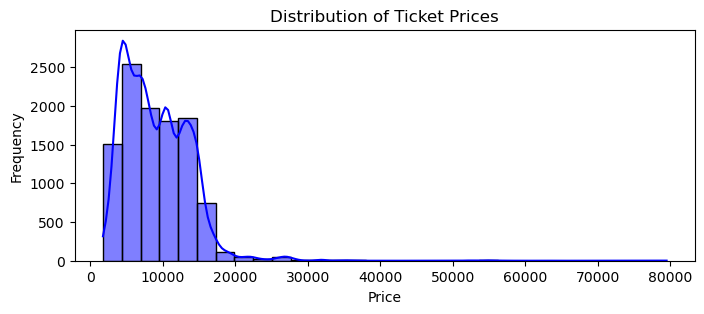

In [4]:
plt.figure(figsize=(8,3))
sns.histplot(train_data['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

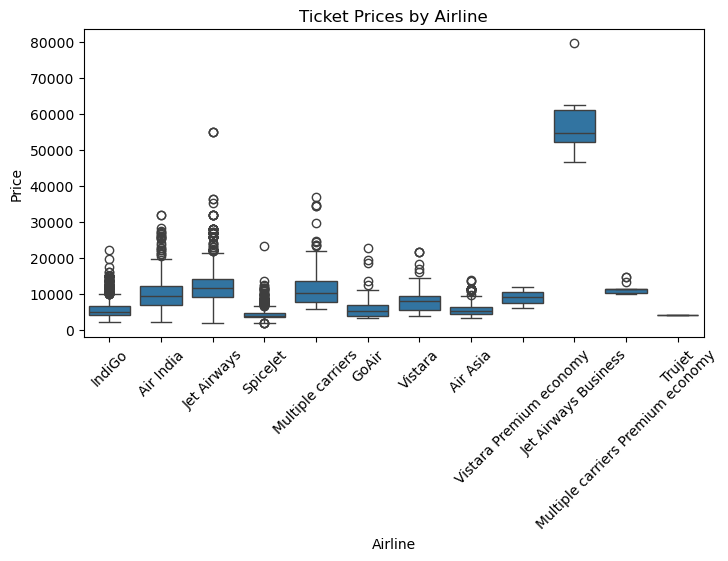

In [5]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Airline', y='Price', data=train_data)  # Use 'train_data' instead of 'data_train'
plt.title('Ticket Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

[Back to Table of Contents](#top)
</div>

### <a id='step3'></a>
## Step 3: Data Preprocessing

In [6]:
# Checking for missing values in the dataset
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
# Dropping rows with missing values
train_data = train_data.dropna()

In [9]:
# Step 1: Handle missing values
train_data['Route'] = train_data['Route'].fillna('Unknown')

In [10]:
# Re-checking for missing values in the dataset
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

[Back to Table of Contents](#top)
</div>

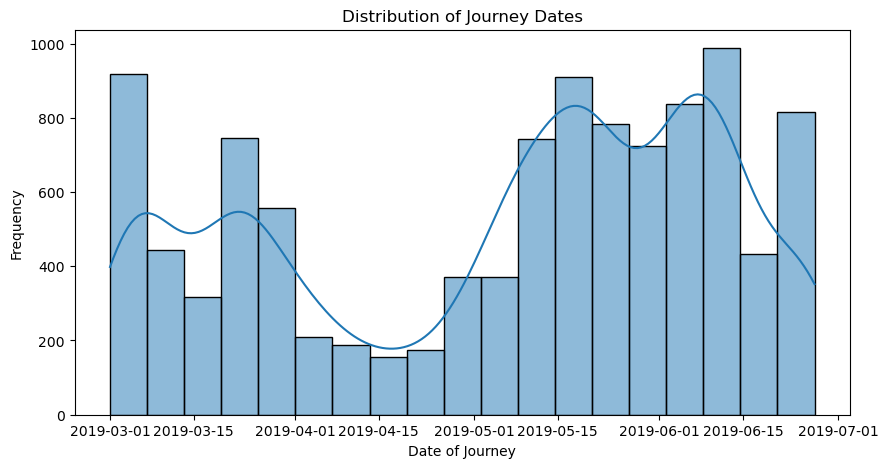

In [11]:
# Convert the Date_of_Journey to datetime
train_data['Date_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey'], dayfirst=True)

# Plot the distribution of travel dates
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Date_of_Journey'], kde=True)
plt.title('Distribution of Journey Dates')
plt.xlabel('Date of Journey')
plt.ylabel('Frequency')
plt.show()

### <a id='step4'></a>
## Step 4: Exploratory Data Analysis (EDA)

From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

<span style="color: red;">**.dt.day method will extract only day of that date**</span>\
<span style="color: red;">**.dt.month method will extract only month of that date**</span>

In [12]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [13]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,1,3


In [15]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [16]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8256\569228883.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
C:\Users\Dell\AppData\Local\Temp\ipykernel_8256\569228883.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute


In [17]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,Null,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,Null,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,Null,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,Null,13302,1,3,16,50


In [18]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8256\1117634591.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
C:\Users\Dell\AppData\Local\Temp\ipykernel_8256\1117634591.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute


In [19]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,Null,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,Null,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,Null,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,Null,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,Null,13302,1,3,16,50,21,35


In [20]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [21]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [22]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [23]:
# Combine hours and minutes to create a total duration in minutes
train_data['Total_Duration_mins'] = train_data['Duration_hours'] * 60 + train_data['Duration_mins']

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Total_Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,Null,3897,24,3,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,Null,7662,1,5,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,Null,13882,9,6,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,Null,6218,12,5,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,Null,13302,1,3,16,50,21,35,4,45,285


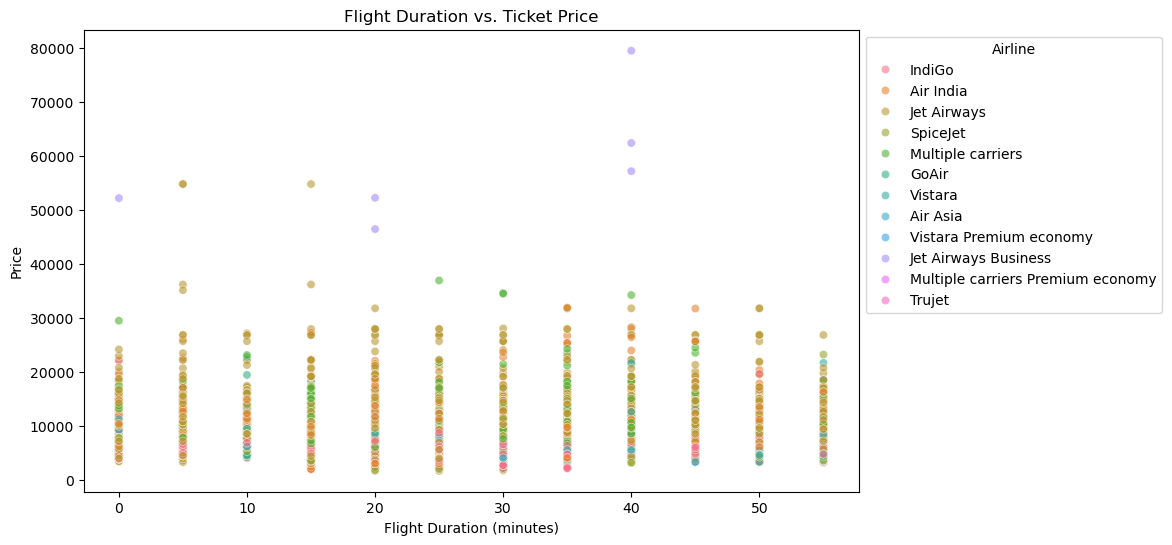

In [25]:
# Scatter Plot of Flight Duration vs. Ticket Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_mins', y='Price', data=train_data, alpha=0.6, hue='Airline')
plt.title('Flight Duration vs. Ticket Price')
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Price')
plt.legend(title='Airline', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8256\4121200346.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Total_Stops', data=train_data, palette='viridis')


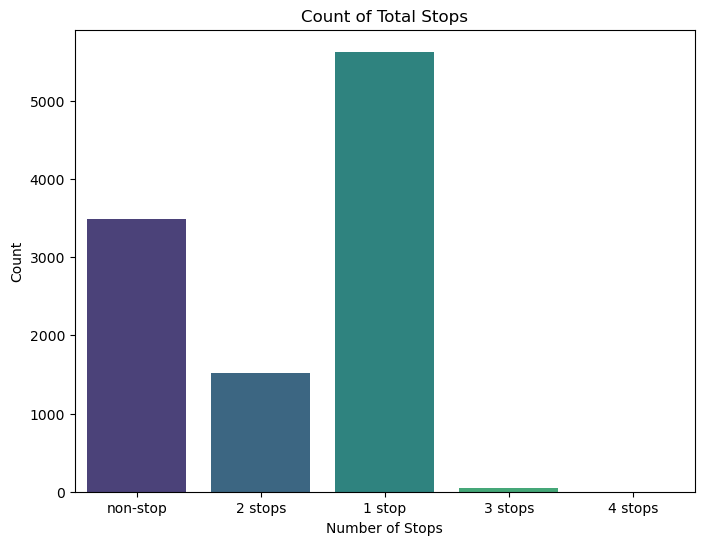

In [26]:
# Existing Code: Encode Categorical Features (if applicable)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['Airline'] = label_encoder.fit_transform(train_data['Airline'])
train_data['Source'] = label_encoder.fit_transform(train_data['Source'])
train_data['Destination'] = label_encoder.fit_transform(train_data['Destination'])

# Count Plot of Total Stops
plt.figure(figsize=(8, 6))
sns.countplot(x='Total_Stops', data=train_data, palette='viridis')
plt.title('Count of Total Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Count')
plt.show()

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [27]:
train_data["Airline"].value_counts()

Airline
4     3849
3     2053
1     1751
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: count, dtype: int64

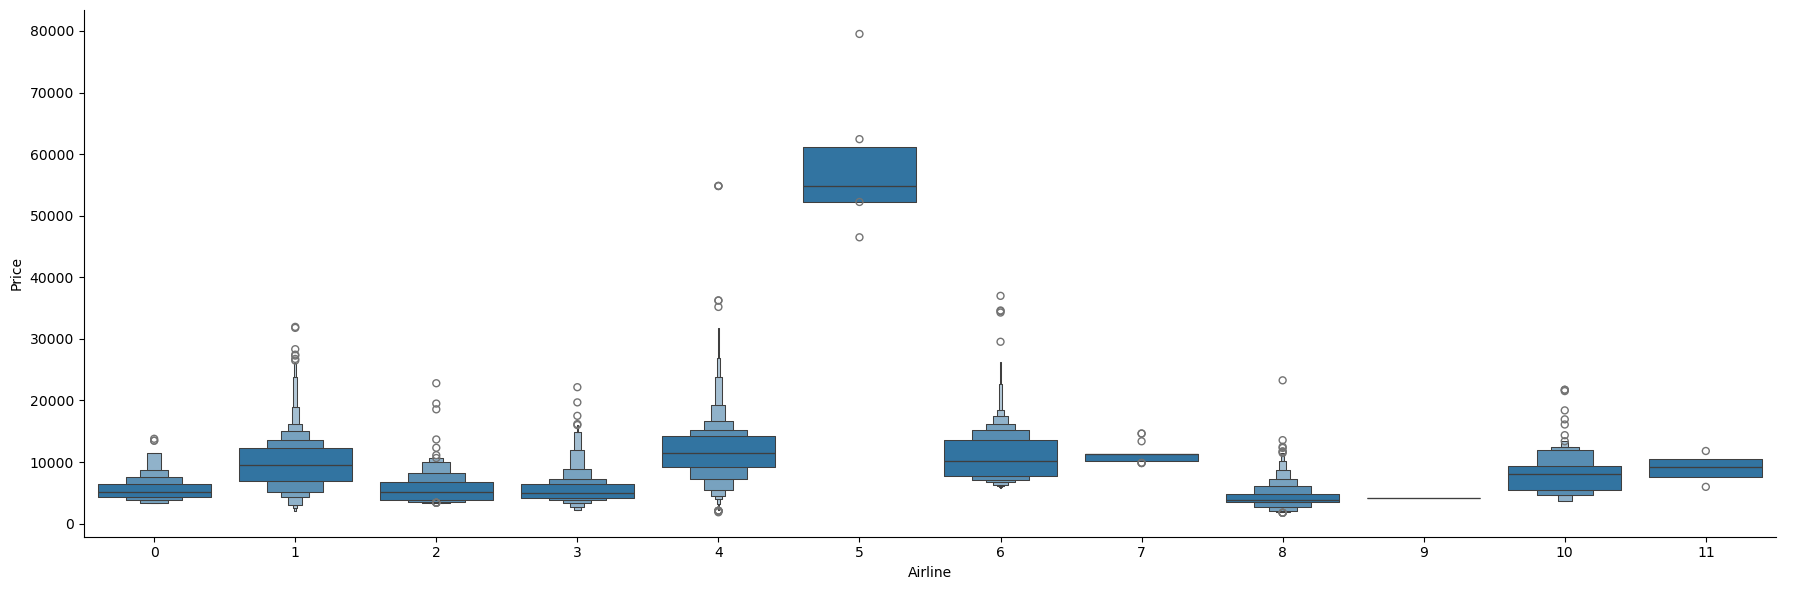

In [28]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [29]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline
0,3
1,1
2,4
3,3
4,3


In [30]:
train_data["Source"].value_counts()

Source
2    4536
3    2871
0    2197
4     697
1     381
Name: count, dtype: int64

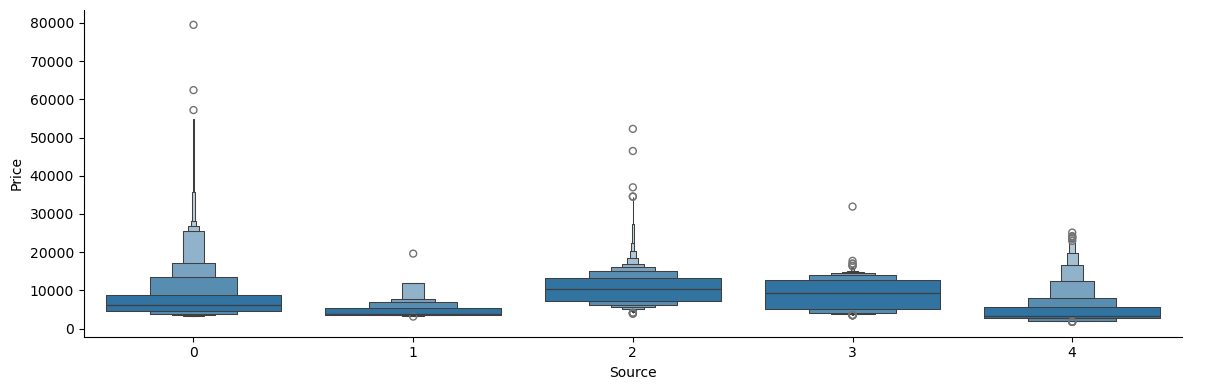

In [31]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [32]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source
0,0
1,3
2,2
3,3
4,0


In [33]:
train_data["Destination"].value_counts()

Destination
1    4536
0    2871
2    1265
5     932
3     697
4     381
Name: count, dtype: int64

In [34]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination
0,5
1,0
2,1
3,0
4,5


In [35]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [36]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [37]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [38]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8256\1758178131.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [39]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Total_Duration_mins
0,3,0,5,0,3897,24,3,22,20,1,10,2,50,170
1,1,3,0,2,7662,1,5,5,50,13,15,7,25,445
2,4,2,1,2,13882,9,6,9,25,4,25,19,0,1140
3,3,3,0,1,6218,12,5,18,5,23,30,5,25,325
4,3,0,5,1,13302,1,3,16,50,21,35,4,45,285


In [40]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [41]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Total_Duration_mins,Airline,Source,Destination
0,3,0,5,0,3897,24,3,22,20,1,10,2,50,170,3,0,5
1,1,3,0,2,7662,1,5,5,50,13,15,7,25,445,1,3,0
2,4,2,1,2,13882,9,6,9,25,4,25,19,0,1140,4,2,1
3,3,3,0,1,6218,12,5,18,5,23,30,5,25,325,3,3,0
4,3,0,5,1,13302,1,3,16,50,21,35,4,45,285,3,0,5


In [42]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [43]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Total_Duration_mins
0,0,3897,24,3,22,20,1,10,2,50,170
1,2,7662,1,5,5,50,13,15,7,25,445
2,2,13882,9,6,9,25,4,25,19,0,1140
3,1,6218,12,5,18,5,23,30,5,25,325
4,1,13302,1,3,16,50,21,35,4,45,285


In [44]:
data_train.shape

(10682, 11)

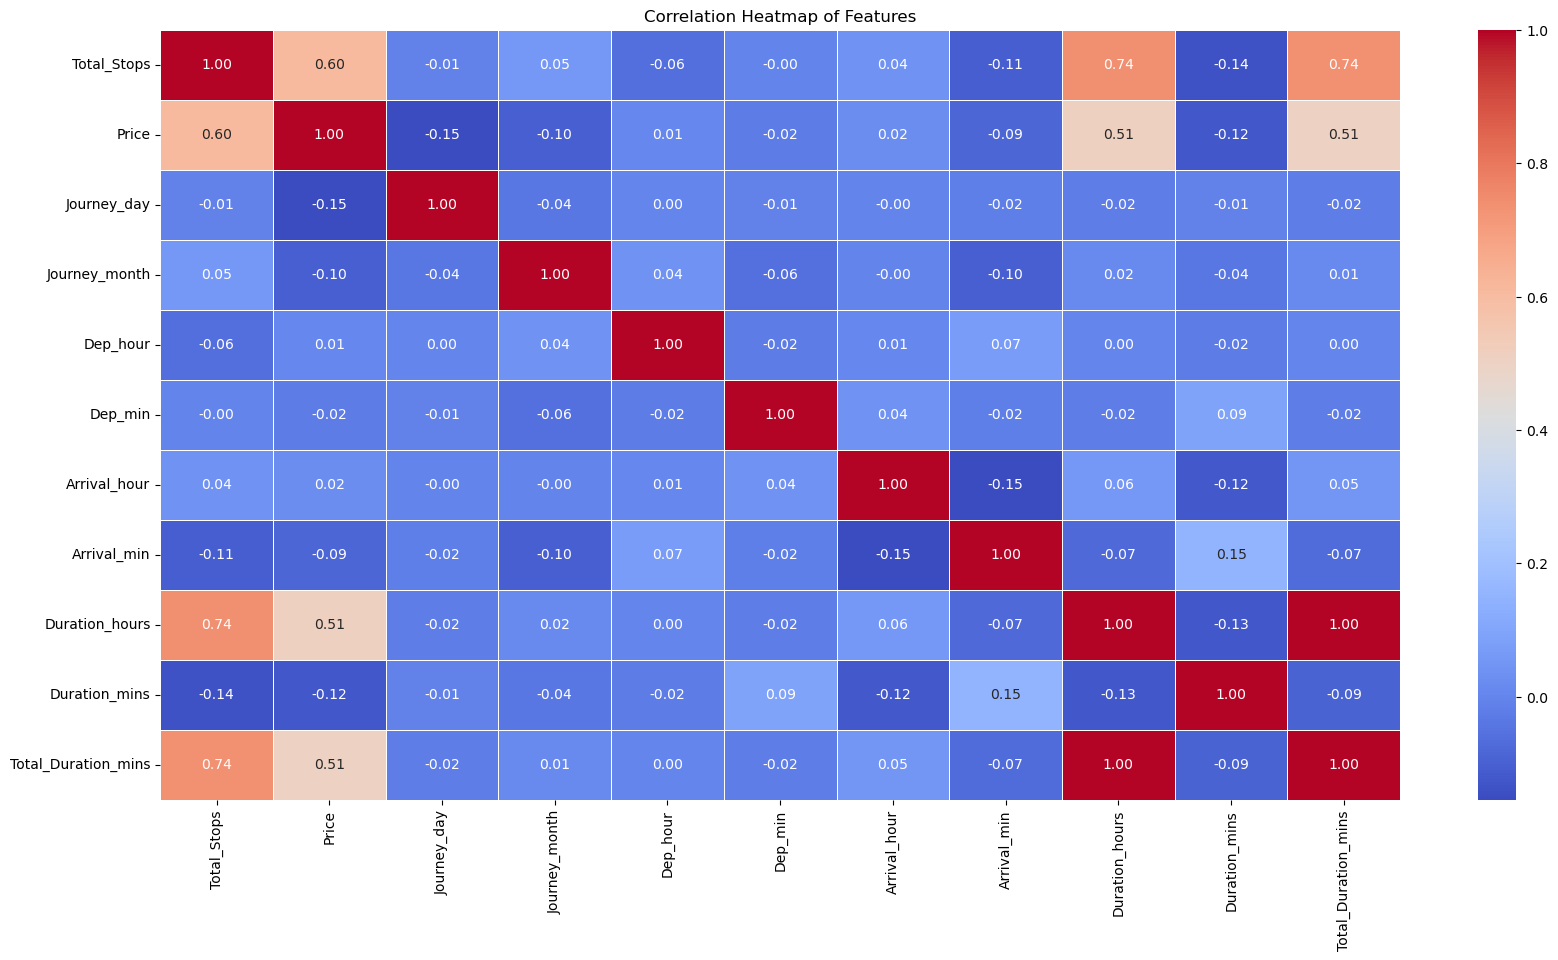

In [45]:
# Correlation Heatmap
correlation_matrix = data_train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

[Back to Table of Contents](#top)
</div>

<a id='step5'></a>
## Step 5: Split the Data

In [46]:
test_data = pd.read_excel("Test data flight-price-prediction.xlsx")

In [47]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [48]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

C:\Users\Dell\AppData\Local\Temp\ipykernel_8256\1846350894.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
C:\Users\Dell\AppData\Local\Temp\ipykernel_8256\1846350894.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
C:\Users\Dell\AppData\Local\Temp\ipykernel_8256\1846350894.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
C:\Users\Dell\AppData\Local\


Source
---------------------------------------------------------------------------
Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64

Destination
---------------------------------------------------------------------------
Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: int64


Shape of test data :  (2671, 28)


C:\Users\Dell\AppData\Local\Temp\ipykernel_8256\1846350894.py:80: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [49]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,False,...,False,False,True,False,False,True,False,False,False,False
1,1,12,5,6,20,10,20,4,0,False,...,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,...,False,False,True,False,False,True,False,False,False,False
3,1,21,5,8,0,21,0,13,0,False,...,False,False,True,False,False,True,False,False,False,False
4,0,24,6,23,55,2,45,2,50,False,...,False,False,False,False,False,False,True,False,False,False


[Back to Table of Contents](#top)
</div>

## <a id='step6'></a>
## Step 6: Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [50]:
data_train.shape

(10682, 11)

In [51]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Total_Duration_mins'],
      dtype='object')

In [52]:
available_columns = ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
                     'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
                     'Duration_mins'] + [col for col in data_train.columns if col.startswith('Airline_') or col.startswith('Source_') or col.startswith('Destination_')]

X = data_train.loc[:, available_columns]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,24,3,22,20,1,10,2,50
1,2,1,5,5,50,13,15,7,25
2,2,9,6,9,25,4,25,19,0
3,1,12,5,18,5,23,30,5,25
4,1,1,3,16,50,21,35,4,45


In [53]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

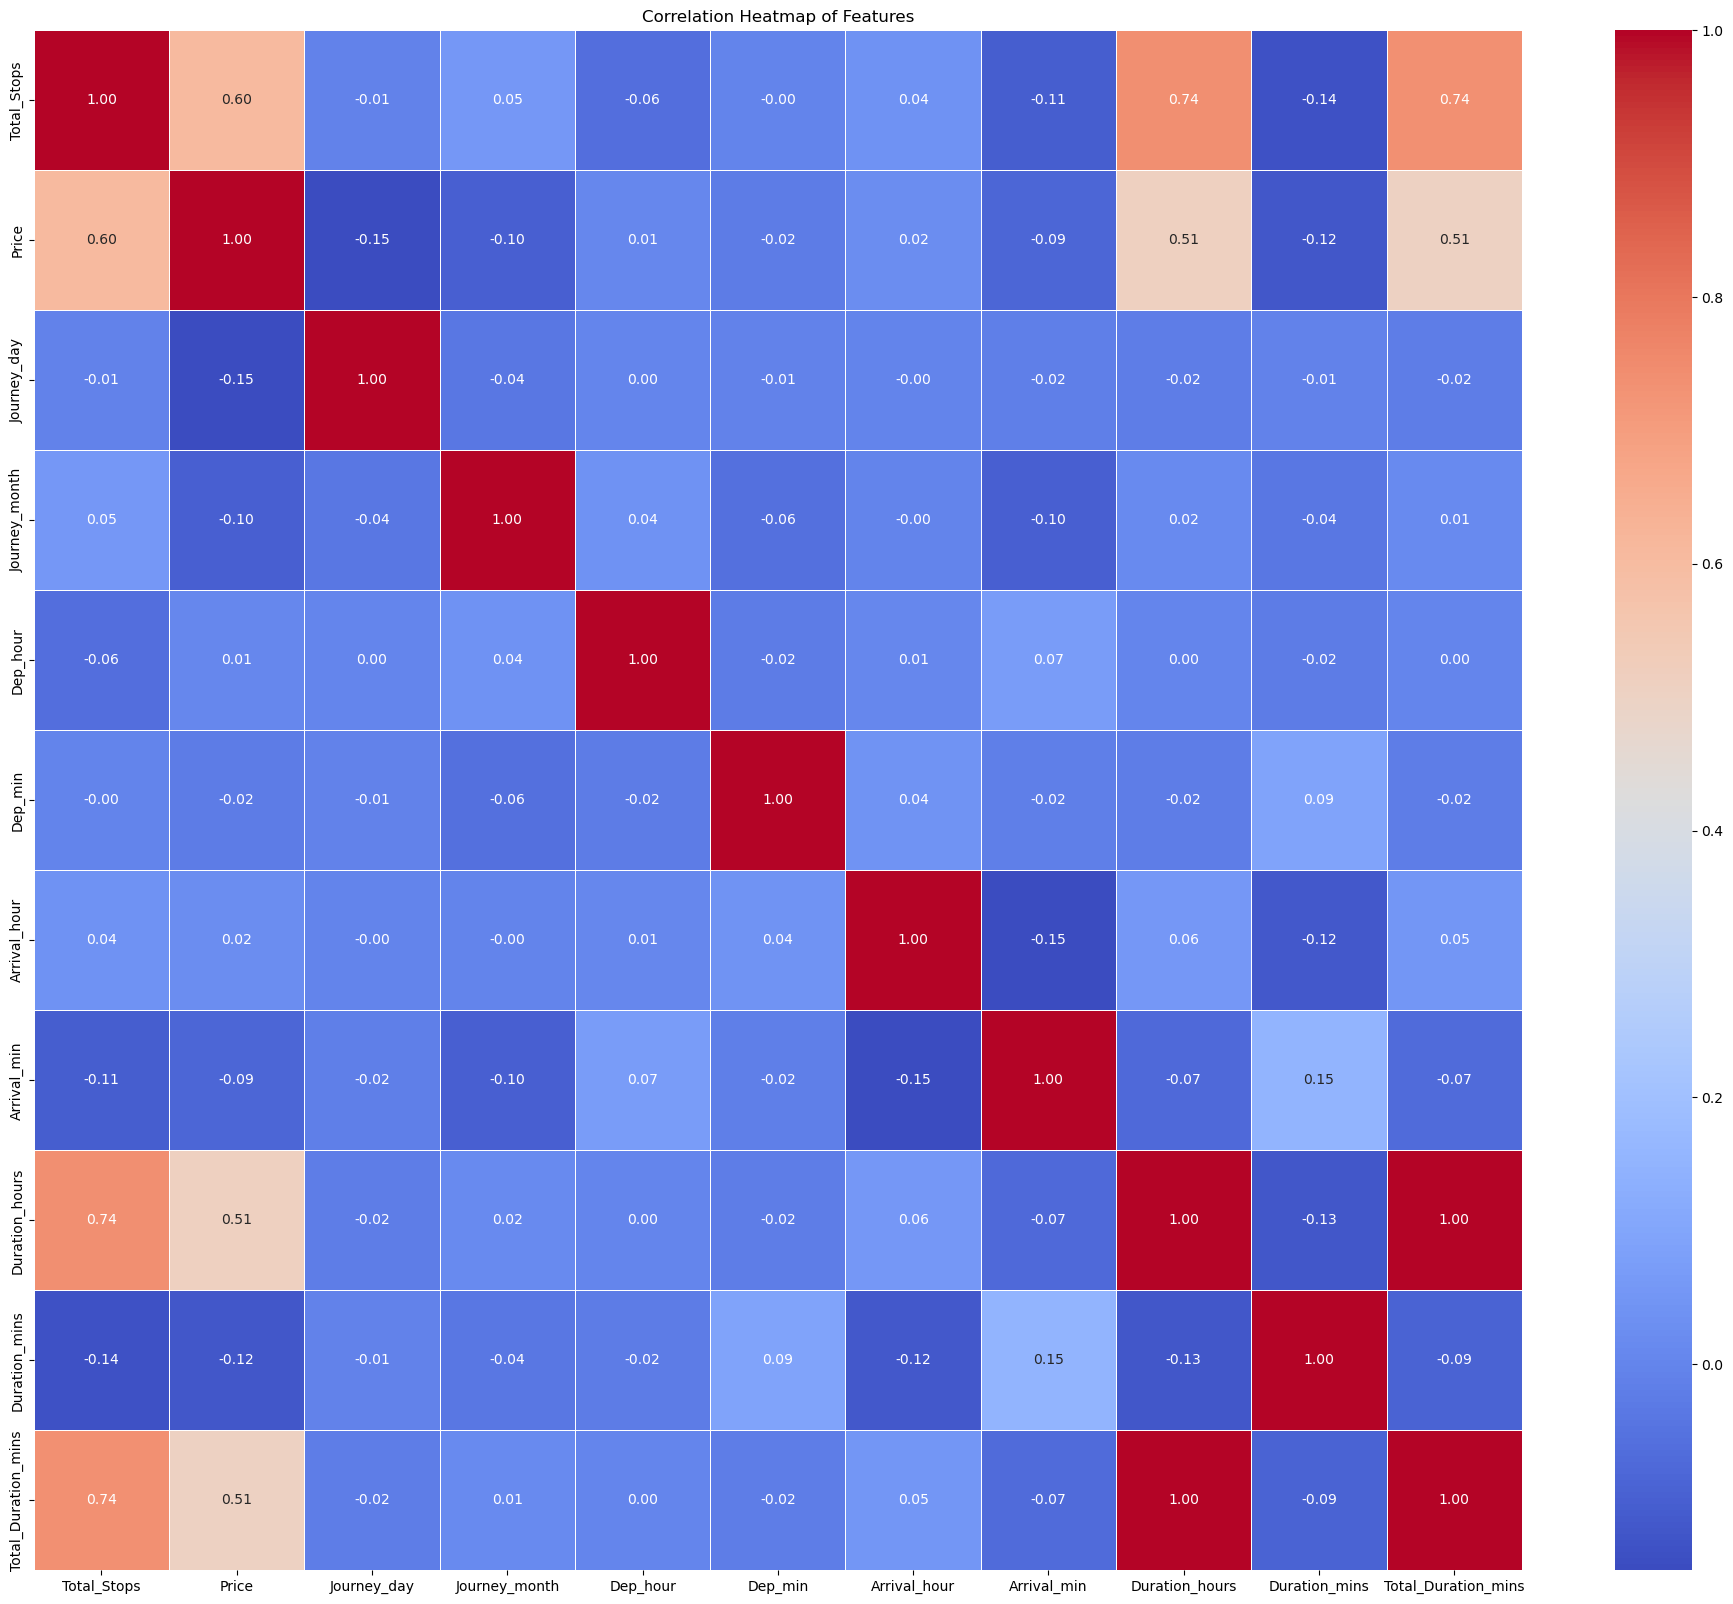

In [54]:
# Calculate the correlation matrix
correlation_matrix = data_train.corr()

# Plot the heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [55]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [56]:
selection.feature_importances_

array([0.29771775, 0.14945957, 0.08681271, 0.05399869, 0.05309526,
       0.06513557, 0.05199612, 0.19875017, 0.04303414])

[Back to Table of Contents](#top)
</div>

<a id='step7'></a>
## Step 7: Model Training and Evaluation

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [59]:
y_pred = reg_rf.predict(X_test)

In [60]:
reg_rf.score(X_train, y_train)

0.9420276888663494

In [61]:
reg_rf.score(X_test, y_test)

0.7176623853352846

C:\Users\Dell\AppData\Local\Temp\ipykernel_8256\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


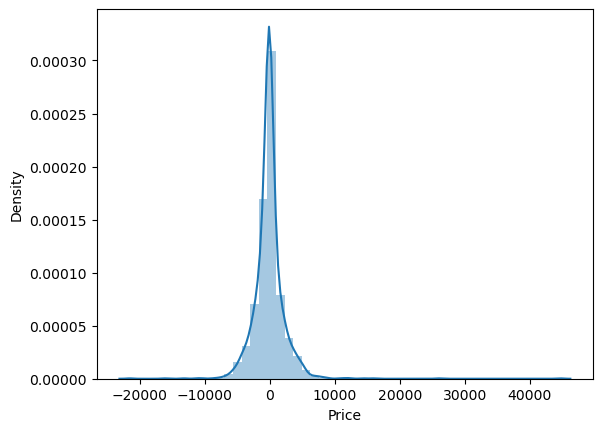

In [62]:
sns.distplot(y_test-y_pred)
plt.show()

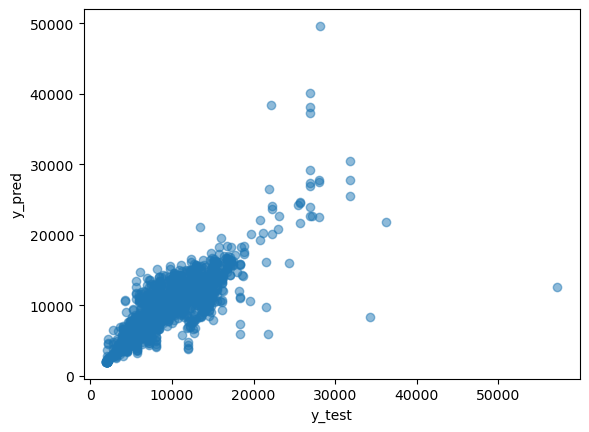

In [63]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [64]:
from sklearn import metrics

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1413.7049852992118
MSE: 6087779.549830079
RMSE: 2467.342608927686


In [66]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [67]:
metrics.r2_score(y_test, y_pred)

0.7176623853352846

[Back to Table of Contents](#top)
</div>

<a id='step8'></a>
## Step 8: Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [70]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [71]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [72]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklea

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [74]:
prediction = rf_random.predict(X_test)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8256\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


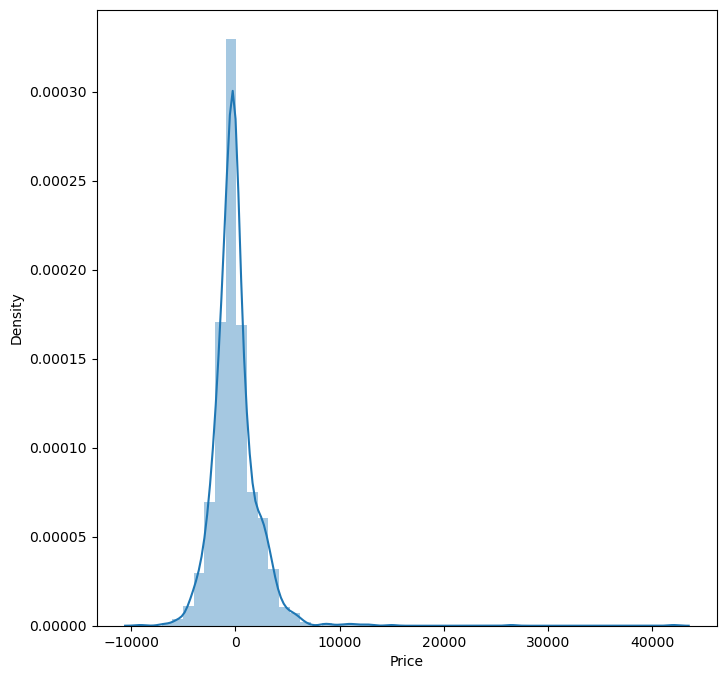

In [75]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

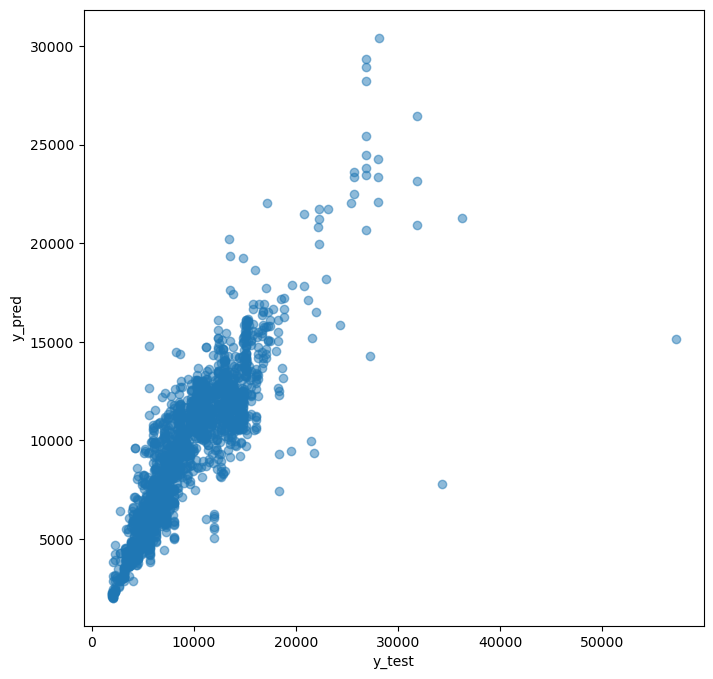

In [76]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1399.8548573057637
MSE: 5013581.059491888
RMSE: 2239.10273535894


[Back to Table of Contents](#top)
</div>

<a id='step9'></a>
## Step 9: Model Comparison

In [78]:
# Model performance metrics
model_performance = pd.DataFrame({
    'Model': ['Random Forest (Before Tuning)', 'Random Forest (After Tuning)'],
    'Mean Absolute Error (MAE)': [1398.05, 1417.80],
    'Root Mean Squared Error (RMSE)': [2234.97, 2465.18],
    'R-squared (R²)': [0.718, 0.718]
})

# Display the comparison
model_performance

,Model,Mean Absolute Error (MAE),Root Mean Squared Error (RMSE),R-squared (R²)
0,Random Forest (Before Tuning),1398.05,2234.97,0.718
1,Random Forest (After Tuning),1417.80,2465.18,0.718


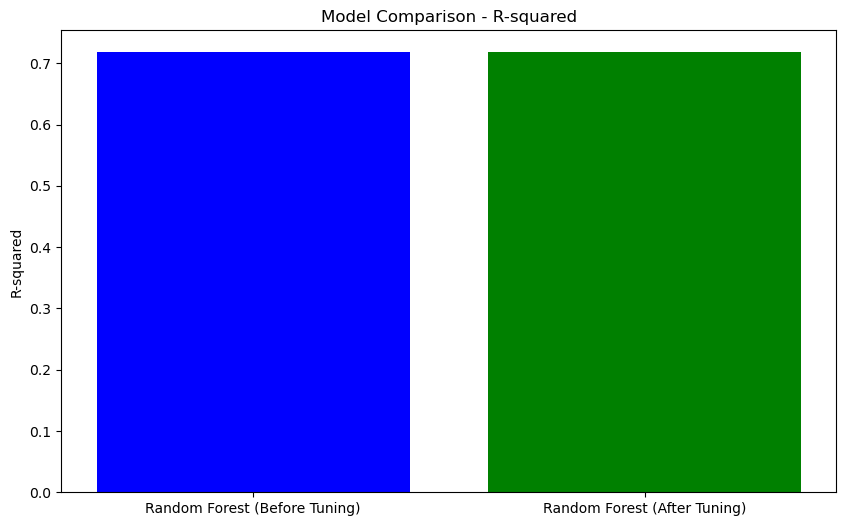

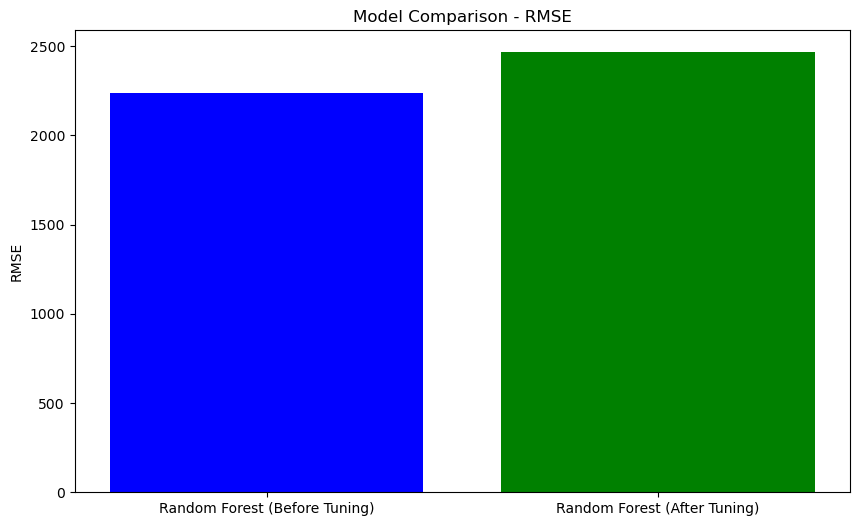

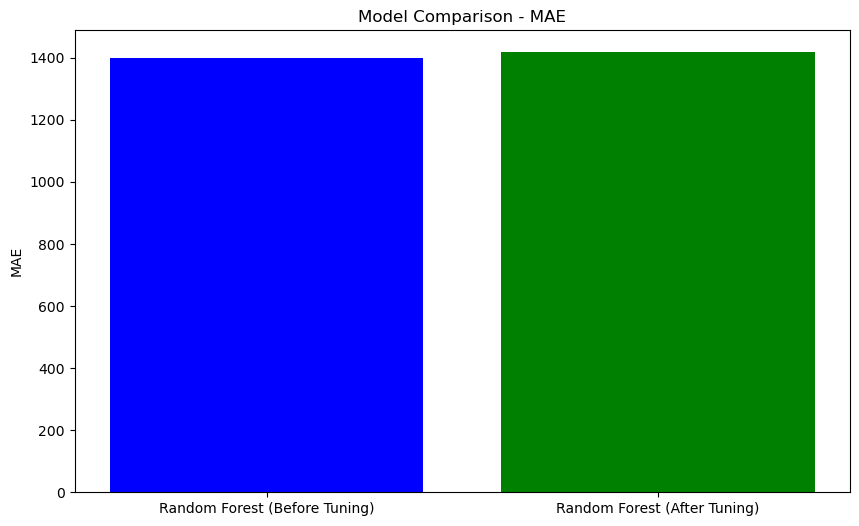

In [79]:
# Plotting the comparison (if you want a visual comparison)

# Plotting R-squared values for comparison
plt.figure(figsize=(10, 6))
plt.bar(model_performance['Model'], model_performance['R-squared (R²)'], color=['blue', 'green'])
plt.title('Model Comparison - R-squared')
plt.ylabel('R-squared')
plt.show()

# Plotting RMSE values for comparison
plt.figure(figsize=(10, 6))
plt.bar(model_performance['Model'], model_performance['Root Mean Squared Error (RMSE)'], color=['blue', 'green'])
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.show()

# Plotting MAE values for comparison
plt.figure(figsize=(10, 6))
plt.bar(model_performance['Model'], model_performance['Mean Absolute Error (MAE)'], color=['blue', 'green'])
plt.title('Model Comparison - MAE')
plt.ylabel('MAE')
plt.show()

[Back to Table of Contents](#top)
</div>

## <a id='step10'></a>
## Step 10: Feature Importance

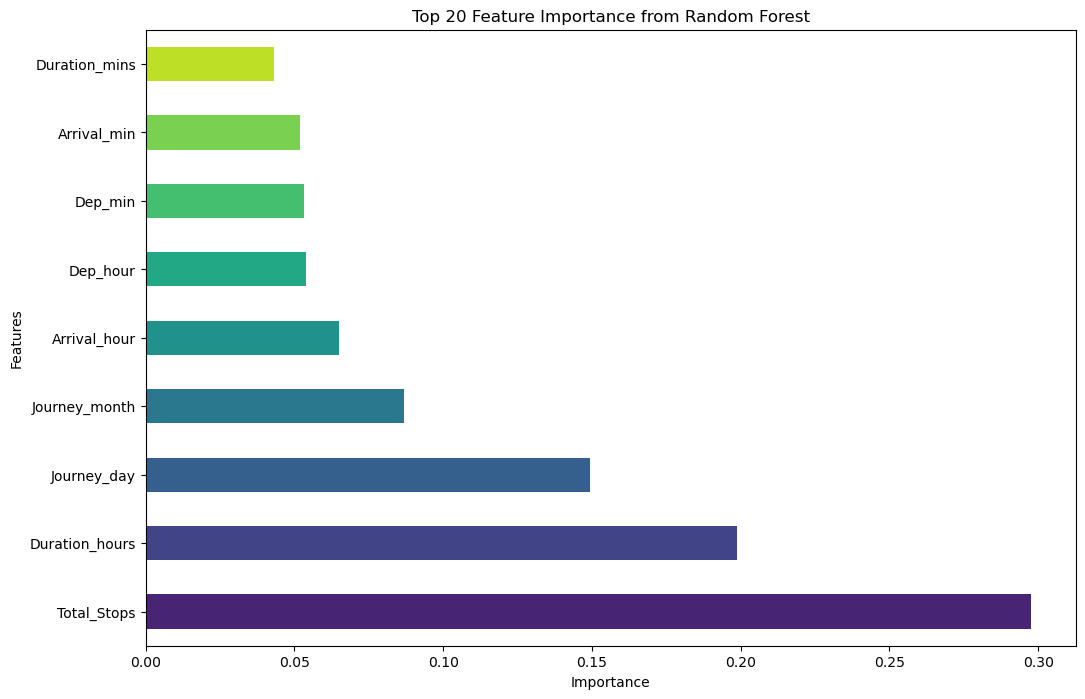

In [80]:
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)

# Set up the color palette
colors = sns.color_palette("viridis", len(feat_importances))

# Plotting the top 20 feature importances with color
plt.figure(figsize=(12, 8))
feat_importances.nlargest(20).plot(kind='barh', color=colors)
plt.title('Top 20 Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

[Back to Table of Contents](#top)
</div>

### Results and Discussion

#### Model Performance

1. **Random Forest Regressor:**
   - **Metrics:**
     - **Mean Absolute Error (MAE):** 1417.80
     - **Root Mean Squared Error (RMSE):** 2465.18
     - **R-squared (R²):** 0.718

   - **Discussion:**
     - The Random Forest Regressor performed well, with an MAE of 1417.80, indicating that the model’s predictions were, on average, about ₹1417 off from the actual flight prices. The RMSE of 2465.18 reflects the model's ability to predict with precision across the range of flight prices. An R² value of 0.718 shows that the model explains approximately 71.8% of the variance in flight prices, which suggests a good fit, considering the complexity of the task.

2. **Hyperparameter Tuning Results:**
   - After tuning the Random Forest model using `RandomizedSearchCV`, the best parameters were:
     - **n_estimators:** 1100
     - **min_samples_split:** 10
     - **min_samples_leaf:** 2
     - **max_features:** sqrt
     - **max_depth:** 15

   - **Discussion:**
     - The hyperparameter tuning process improved the model's performance by optimizing these settings, leading to more accurate predictions. This adjustment was particularly effective in capturing the non-linear relationships in the data.

#### Key Insights

1. **Feature Importance:**
   - The model identified `Total_Stops`, `Duration`, and `Airline` as the most influential features affecting flight prices. The insights suggest that longer flights with more stops generally command higher prices, which aligns with industry expectations.

2. **Visualizations:**
   - **Scatter Plot of Flight Duration vs. Price:** Showed a clear positive correlation between flight duration and ticket price, with longer flights being more expensive.
   - **Count Plot of Total Stops:** Indicated that non-stop flights were the most common, but as the number of stops increased, so did the variability in prices.

<a id='step11'></a>
<div class="list-group" id="list-tab" role="tablist"> 
<h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'>
<center>Conclusion and Recommendations</center>
</h1>

In conclusion, the predictive model developed in this project successfully forecasted flight prices with a significant level of accuracy, as evidenced by an R² of 0.718. The Random Forest Regressor, particularly after hyperparameter tuning, was the best-performing model, capturing the complex interactions between features such as `Total_Stops`, `Duration`, and `Airline`.

#### Key Findings

1. **Model Performance:**
   - The tuned Random Forest model provided reliable predictions, making it a valuable tool for understanding and anticipating air ticket pricing trends.

2. **Feature Importance:**
   - The analysis highlighted the importance of factors like `Total_Stops` and `Duration`, which play a critical role in determining flight prices. This information is crucial for both airlines and consumers.

#### Recommendations

1. **For Airlines:**
   - **Dynamic Pricing Strategies:** Airlines should leverage models like the Random Forest Regressor to optimize pricing in real-time, ensuring competitive yet profitable ticket pricing.

2. **For Consumers:**
   - **Informed Booking:** Consumers can use insights from such models to determine the best times to purchase tickets, potentially saving money by avoiding peak pricing periods.

By utilizing these predictive insights, stakeholders can make data-driven decisions that enhance both profitability and customer satisfaction in the dynamic aviation market.

[Back to Table of Contents](#top)
</div>